<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]

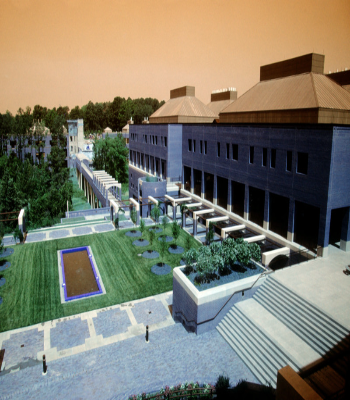

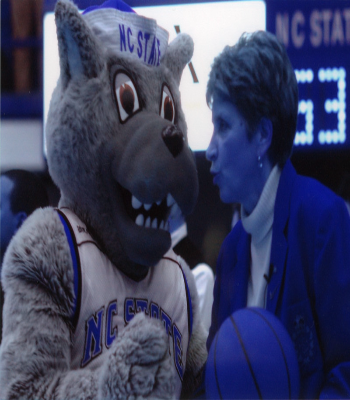

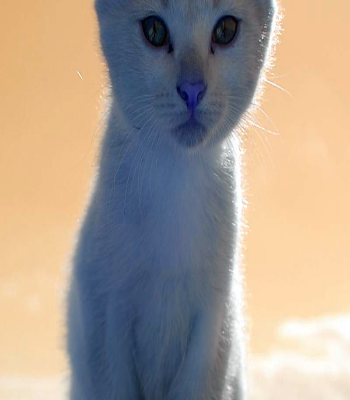

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  resized = cv2.resize(image, (350, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

## Image Addition

(400, 350, 3)
(400, 350, 3)


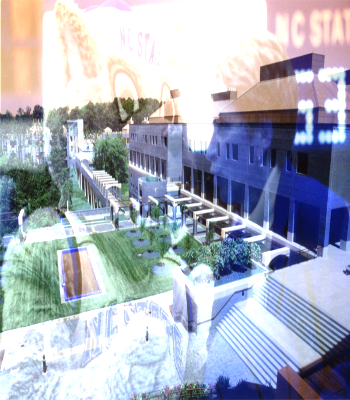

In [ ]:
addition_1 = cv2.add(images[0], images[1])
print(addition_1.shape)
print(images[0].shape)
cv2_imshow(addition_1)

(400, 350, 3)
(400, 350, 3)


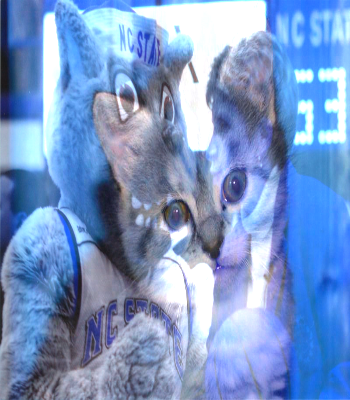

In [ ]:
addition_2 = cv2.add(images[1], images[2])
print(addition_2.shape)
print(images[0].shape)
cv2_imshow(addition_2)

## Image Subtraction

(400, 350, 3)
(400, 350, 3)


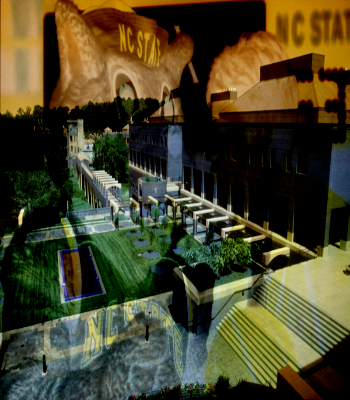

In [ ]:
subtraction_1 = cv2.subtract(images[0], images[1])
print(subtraction_1.shape)
print(images[0].shape)
cv2_imshow(subtraction_1)

(400, 350, 3)
(400, 350, 3)


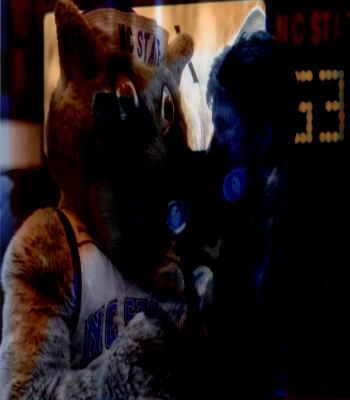

In [ ]:
subtraction_2 = cv2.subtract(images[1], images[2])
print(subtraction_2.shape)
print(images[0].shape)
cv2_imshow(subtraction_2)

## Image Enhancement - 1 - GrayScale Histogram Equalization

We find out the histograms of the grayscale image and look for the distribution of intensities. We will use cv2.equalizeHist() function with the purpose of equalizing the contrast of a given grayscale image. cv2.equalizeHist() function normalises the brightness and also increases the contrast.

In [ ]:
gray_img = cv2.cvtColor(images[0],cv2.COLOR_BGR2GRAY)
gray_img1 = cv2.cvtColor(images[1],cv2.COLOR_BGR2GRAY)

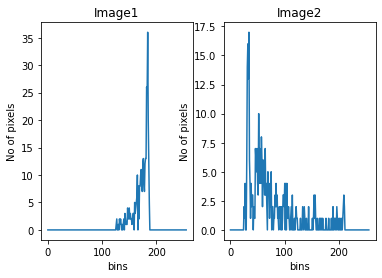

In [ ]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.subplot(122)
plt.title("Image2")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist1)
plt.show()

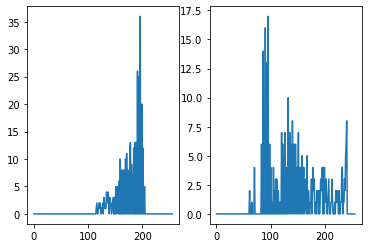

In [ ]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
gray_img1_eqhist=cv2.equalizeHist(gray_img1)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(hist1)
plt.show()

(400, 350)
(400, 350, 3)
(400, 350)
(400, 350, 3)


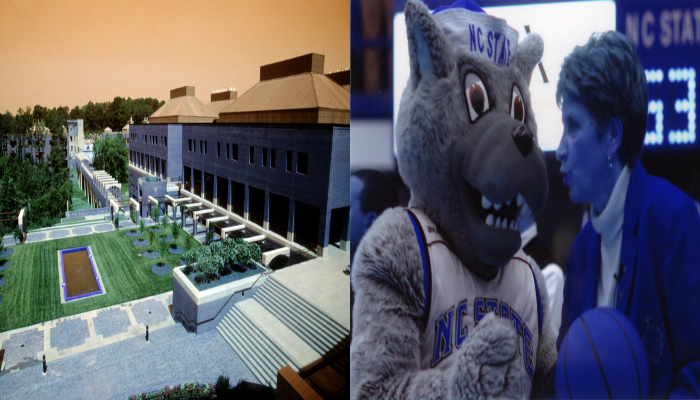

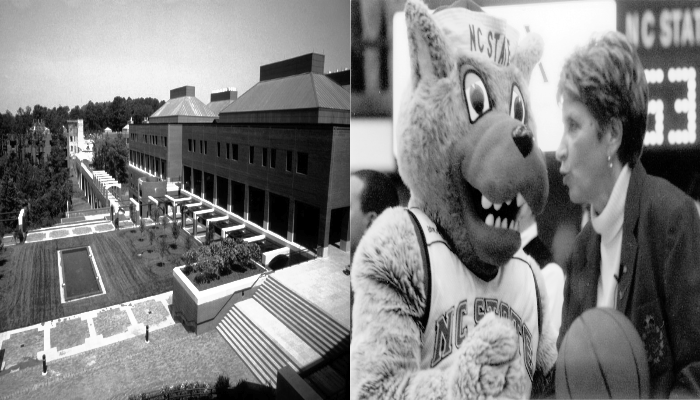

In [ ]:
eqhist_images=np.concatenate((gray_img_eqhist,gray_img1_eqhist),axis=1)
print(gray_img_eqhist.shape)
print(images[0].shape)
print(gray_img1_eqhist.shape)
print(images[1].shape)
before_images=np.concatenate((images[0],images[1]),axis=1)
cv2_imshow(before_images)
cv2_imshow(eqhist_images)

## Image Enhancement - 2 - Intensity Slicing
It highlights a specific range of grey levels in an image.

1st transformation brightens the desired range of grey levels but preserves grey levels unchanged.
2nd transformation displays a high value of all grey levels in the range of interest and a low value for all other grey levels.

In [ ]:
im = cv2.cvtColor(images[2],cv2.COLOR_BGR2GRAY)

In [ ]:
lower_limit = 100
upper_limit = 150
mask = cv2.inRange(im,lower_limit, upper_limit);
im_grey_scaling = im.copy()
im_grey_scaling[mask>0]=255

(400, 350)
(400, 350, 3)


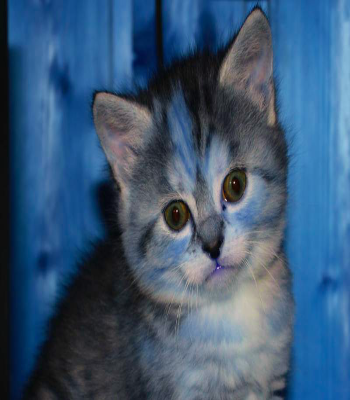

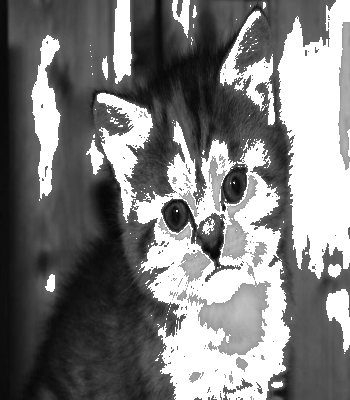

In [ ]:
print(im_grey_scaling.shape)
print(images[2].shape)
cv2_imshow(images[2])
cv2_imshow(im_grey_scaling)

## Image Enhancement - 3 - Sharpen
The process of blurring, sharpening, embossing, edge detection, and others, require that a kernel be applied to the image pixels, which is also why this process is also referred to as Convolution- i.e, the process during which the kernel is applied to the image.
Commonly used sharpening kernel is: https://en.wikipedia.org/wiki/Kernel_(image_processing)

```
([[0, -1, 0],
 [-1, 5,-1],
 [0, -1, 0]])
```

In [ ]:
image1 = images[0]
image2 = images[1]
image3 = images[2]

In [ ]:
def sharpen(image):
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
  print(image.shape)
  print(image_sharp.shape)
  cv2_imshow(image)
  cv2_imshow(image_sharp)

(400, 350, 3)
(400, 350, 3)


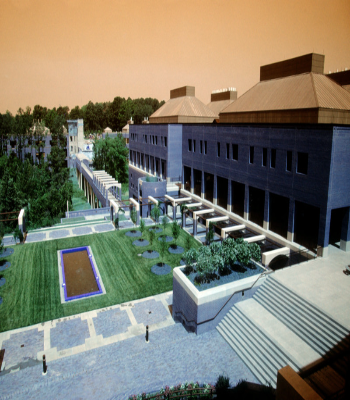

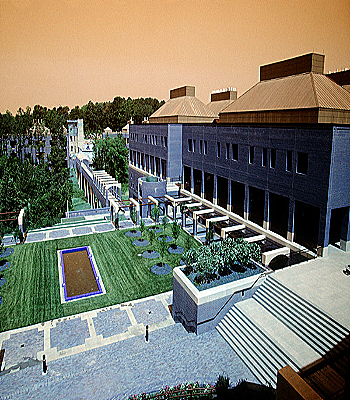

In [ ]:
sharpen(image1)

(400, 350, 3)
(400, 350, 3)


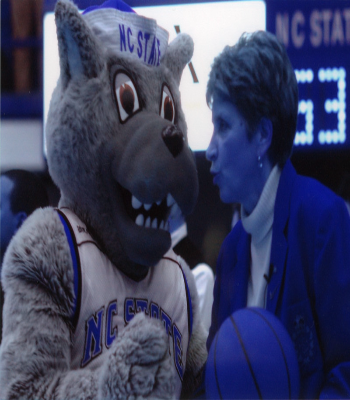

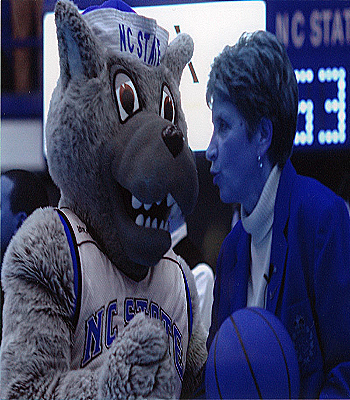

In [ ]:
sharpen(image2)

(400, 350, 3)
(400, 350, 3)


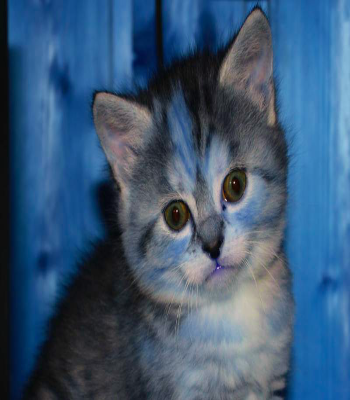

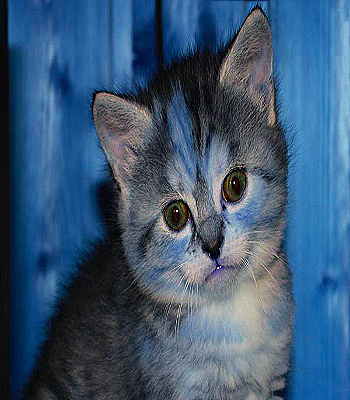

In [ ]:
sharpen(image3)